# **Importing the libraries**

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Randomly initializing mean and other parameters**

In [3]:
# Set the mean and covariance
mean1 = [0, 0]
mean2 = [2, 0]
cov1 = [[1, .7], [.7, 1]]
cov2 = [[.5, .4], [.4, .5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1, cov1, size=1000)
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)

**Visualize**

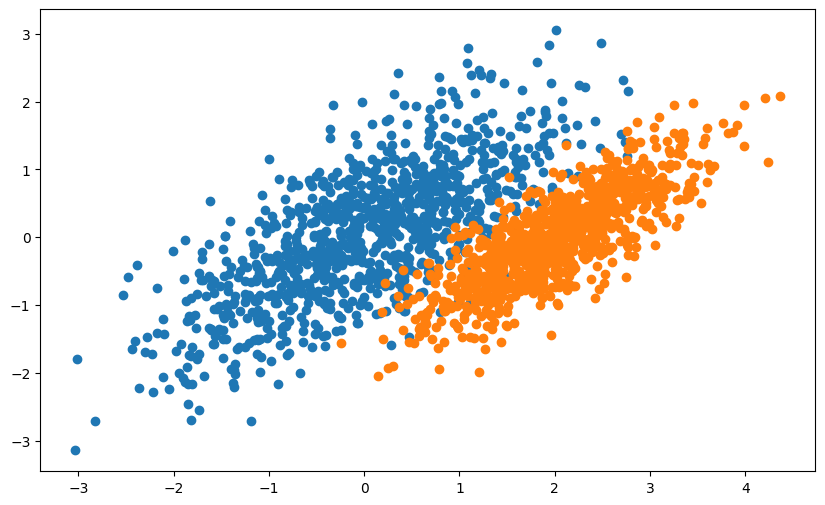

In [4]:
plt.figure(figsize=(10,6))

plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data2[:,0],data2[:,1])

plt.grid(False)
plt.show()

<Axes: ylabel='Density'>

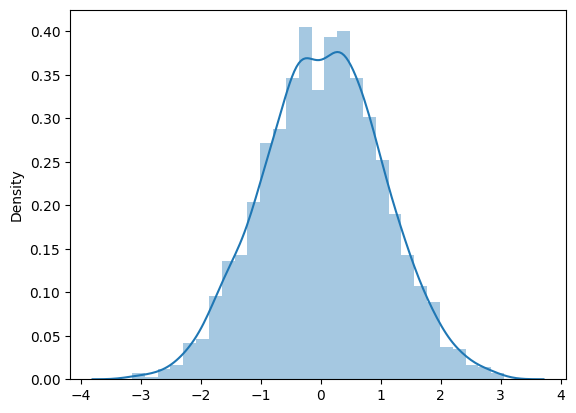

In [5]:
sns.distplot(data1)

<Axes: ylabel='Density'>

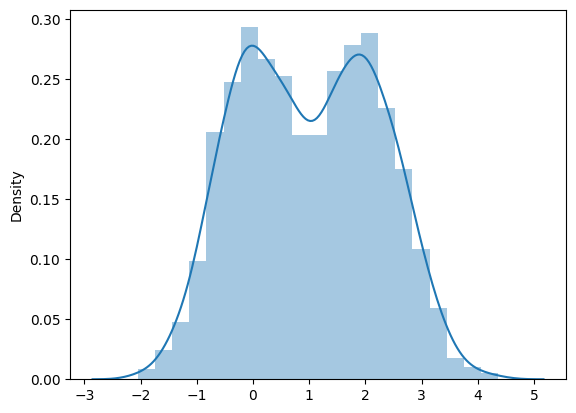

In [6]:
sns.distplot(data2)

<hr>

# **Difference KMeans and GMM**

**Needed Libraries**

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

**Randomly Generated Data**

In [8]:
# Generate synthetic data
np.random.seed(42)
X = np.vstack([
    np.random.normal(0, 1, (300, 2)),
    np.random.normal(5, 1, (300, 2)),
    np.random.normal(10, 1, (300, 2))
])

**Fitting both the algorithms at the same time**

In [9]:
# Fit K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, max_iter=100)
gmm.fit(X)
gmm_labels = gmm.predict(X)

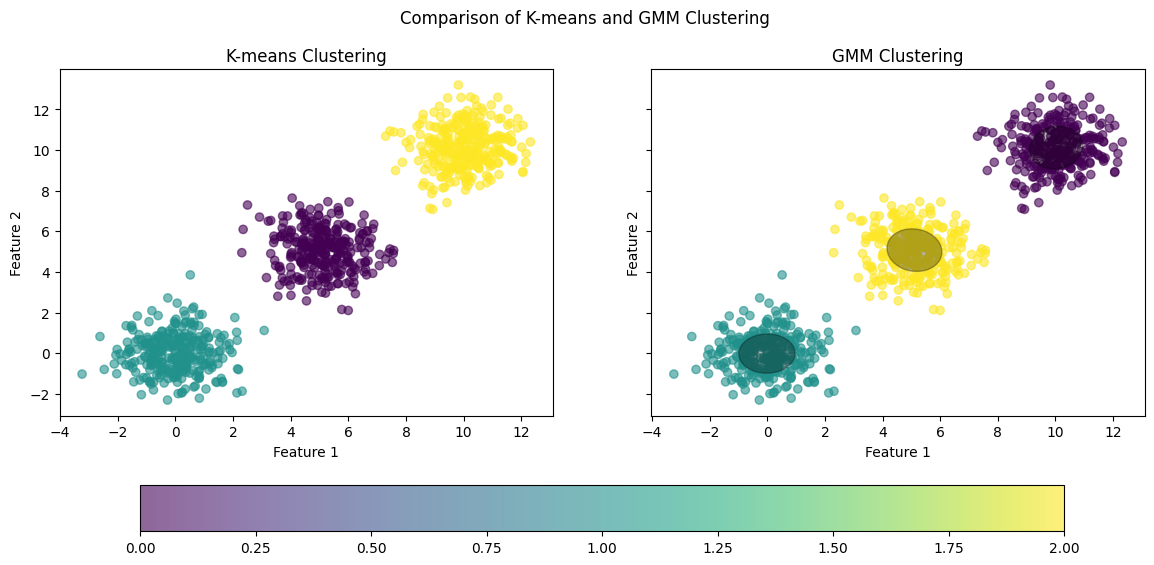

In [10]:
# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
titles = ['K-means Clustering', 'GMM Clustering']

for ax, labels, title in zip(axs, [kmeans_labels, gmm_labels], titles):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Add ellipses for GMM
    if title == 'GMM Clustering':
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            if covar.shape == (2, 2):
                eigvals, eigvecs = np.linalg.eigh(covar)
                order = eigvals.argsort()[::-1]
                eigvals, eigvecs = eigvals[order], eigvecs[:, order]
                angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
                width, height = 2 * np.sqrt(eigvals)
                ellipse = Ellipse(xy=pos, width=width, height=height, angle=angle, color='k', alpha=0.3)
                ax.add_artist(ellipse)

fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=.1)
plt.suptitle('Comparison of K-means and GMM Clustering')
plt.show()

# **For our understanding**

In [11]:
np.random.seed(0)

**Generate some random set of data**

In [12]:
data1 = np.random.normal(0, 1, (100, 2))

In [13]:
data1

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [20]:
a = pd.DataFrame(data1, columns=["F1", "F2"])

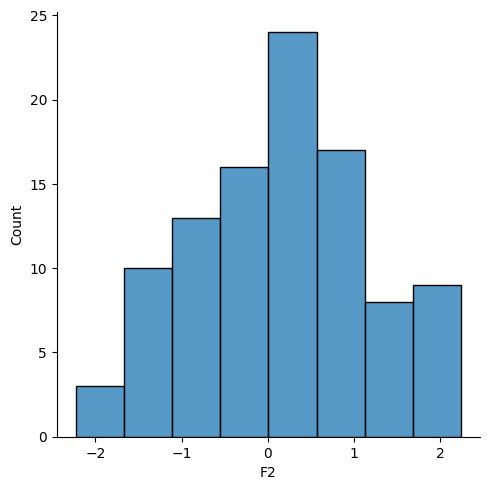

In [22]:
sns.displot(a["F2"])

In [23]:
data2 = np.random.normal(5, 1.5, (300, 2))

In [24]:
data = np.vstack([data1, data2])

In [26]:
len(data)

400

**Creating a GMM**

In [27]:
model = GaussianMixture(n_components = 2, random_state = 1)

In [28]:
model.fit(data)

GaussianMixture(n_components=2, random_state=1)

**Predict the clusters**

In [29]:
labels = model.predict(data)

**Assuming some random data**

In [30]:
new_data_points = np.array([[2, 2]])

In [31]:
probabilities = model.predict_proba(new_data_points)

In [32]:
probabilities

array([[0.6932539, 0.3067461]])

**Visualize**

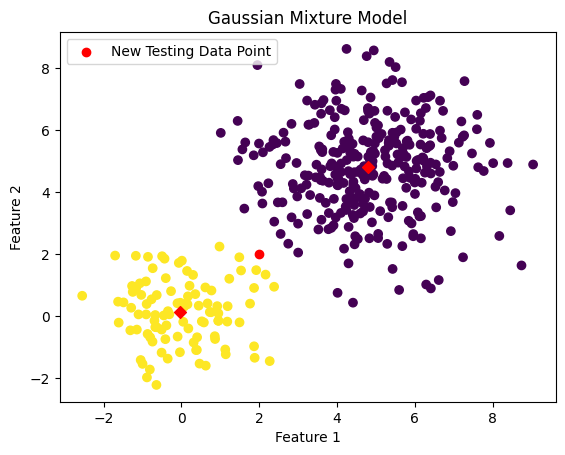

In [34]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = "viridis")
plt.scatter(model.means_[:, 0], model.means_[:, 1], c = "red", marker = "D")
plt.scatter(new_data_points[:, 0], new_data_points[:, 1], c = "red", marker = "o", label = "New Testing Data Point")
plt.title("Gaussian Mixture Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
#